In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
algo_results_src = '/Users/davide/Developer/ml-tropical-cyclones-detection/data/inference/trackers_comparison/algorithms_comparison.csv'

selected_model = '10_swin_lnc3_msl_vo_850'
algo_results = pd.read_csv(algo_results_src, index_col=0)
algo_results = algo_results[algo_results['model']==selected_model]


In [3]:
test_algo_results = algo_results[algo_results['years']=='test']
all_algo_results = algo_results[algo_results['years']=='all']

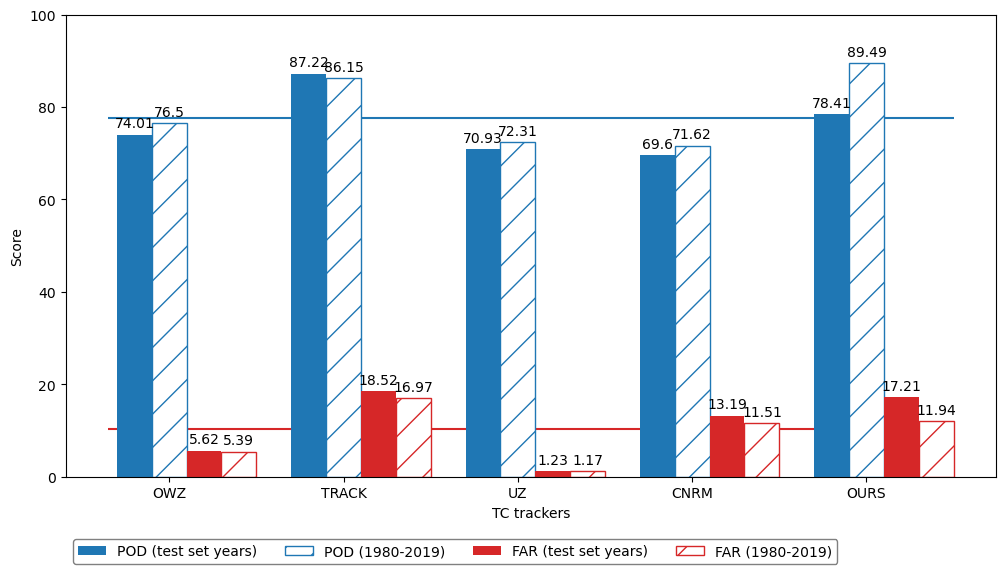

In [4]:
x = np.arange(len(test_algo_results))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12,6))

# add horizontal mean
ax.hlines(y=algo_results['pod'].mean(), xmin=-0.15, xmax=4.7, zorder=0, color='tab:blue')
ax.hlines(y=algo_results['far'].mean(), xmin=-0.15, xmax=4.7, zorder=0, color='tab:red')

offset = width * multiplier
rects = ax.bar(x + offset, np.round(test_algo_results['pod'],2), width, label='POD (test set years)', color='tab:blue')
ax.bar_label(rects, padding=3)
multiplier += 1

offset = width * multiplier
rects = ax.bar(x + offset, np.round(all_algo_results['pod'],2), width, hatch = "/", label='POD (1980-2019)', color = "white", edgecolor='tab:blue')
ax.bar_label(rects, padding=3)
multiplier += 1

offset = width * multiplier
rects = ax.bar(x + offset, np.round(test_algo_results['far'],2), width, label='FAR (test set years)', color='tab:red')
ax.bar_label(rects, padding=3)
multiplier += 1

offset = width * multiplier
rects = ax.bar(x + offset, np.round(all_algo_results['far'],2), width, hatch = "/", label='FAR (1980-2019)', color = "white", edgecolor='tab:red')
ax.bar_label(rects, padding=3)
multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_xlabel('TC trackers')
ax.set_xticks(x + width, test_algo_results['algo'])
ax.set_ylim(0, 100)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(loc='upper left', markerscale=8, edgecolor='gray', framealpha=1, ncol=4, bbox_to_anchor=(0.0 ,-0.12))

plt.show()

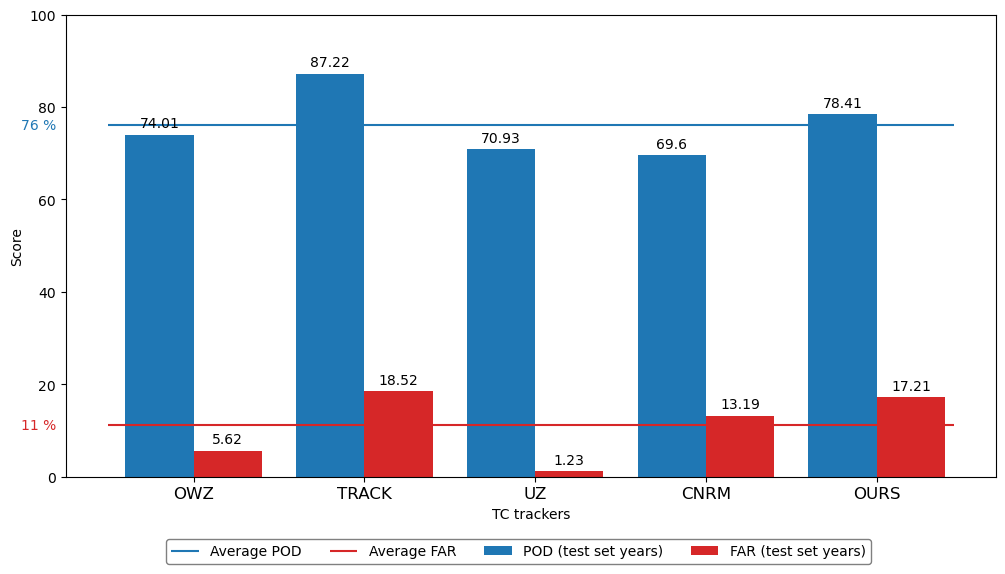

In [5]:
import matplotlib.transforms as transforms

x = np.arange(len(test_algo_results))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12,6))

# add horizontal mean
ax.hlines(y=test_algo_results['pod'].mean(), xmin=-0.3, xmax=4.65, zorder=0, color='tab:blue', label='Average POD')
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0, test_algo_results['pod'].mean(), "{:.0f} %".format(test_algo_results['pod'].mean()), color="tab:blue", transform=trans, ha="right", va="center")

ax.hlines(y=test_algo_results['far'].mean(), xmin=-0.3, xmax=4.65, zorder=999, color='tab:red', label='Average FAR')
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0, test_algo_results['far'].mean(), "{:.0f} %".format(test_algo_results['far'].mean()), color="tab:red", transform=trans, ha="right", va="center")

offset = width * multiplier
rects = ax.bar(x + offset, np.round(test_algo_results['pod'],2), width, label='POD (test set years)', color='tab:blue')
ax.bar_label(rects, padding=3)
multiplier += 1

offset = width * multiplier
rects = ax.bar(x + offset, np.round(test_algo_results['far'],2), width, label='FAR (test set years)', color='tab:red')
ax.bar_label(rects, padding=3)
multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_xlabel('TC trackers')
ax.set_xticks(x + width/2, test_algo_results['algo'], fontsize=12)
ax.set_ylim(0, 100)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(loc='upper left', markerscale=8, edgecolor='gray', framealpha=1, ncol=4, bbox_to_anchor=(0.1 ,-0.12))

plt.show()